<a href="https://colab.research.google.com/github/rohithdonthi/Projects/blob/main/Amazon_Customer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/Project 5-->> Amazon Customers Data Analysis/database.sqlite')

In [ ]:
type(con)

sqlite3.Connection

In [ ]:
df = pd.read_sql_query('SELECT * FROM Reviews', con)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
pd.read_sql_query('SELECT * FROM Reviews LIMIT 3', con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 5-->> Amazon Customers Data Analysis/Reviews.csv')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
#Perform Sentiment Analysis 

In [ ]:
!pip install TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
text = df['Summary'][0]
text

'Good Quality Dog Food'

In [ ]:
TextBlob(text).sentiment.polarity

0.7

In [ ]:
polarity =[]

for i in df['Summary']:
  try:
    polarity.append(TextBlob(i).sentiment.polarity)
  except:
    polarity.append(0)

In [ ]:
len(polarity)

568454

In [ ]:
data = df.copy()

In [ ]:
data['Polarity'] = polarity
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [ ]:
#Positive sentences 

In [ ]:
data_positive = data[data['Polarity'] > 0]

In [ ]:
data_positive.shape

(331665, 11)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
total_text = (' '.join(data_positive['Summary']))

In [ ]:
len(total_text)

8465012

In [ ]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [59]:
data_negative = data[data['Polarity'] < 0]

In [60]:
data_negative.shape

(52516, 11)

In [62]:
total_text = (' '.join(data_negative['Summary']))

In [63]:
len(total_text)

1438541

In [64]:
total_text[0:10000]

'poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley\'s Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don\'t Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad b

In [66]:
df['UserId'].nunique()

256059

In [71]:
raw = df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean', 'ProductId':'count'}).sort_values(by='Text',ascending=False)

In [72]:
raw.columns = ['number_of_summaries','num_text','avg_score','no_of_products_purchased']
raw.head(10)

,number_of_summaries,num_text,avg_score,no_of_products_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
A1TMAVN4CEM8U8,204,204,4.833333,204
A2MUGFV2TDQ47K,201,201,3.751244,201
A3TVZM3ZIXG8YW,199,199,1.000000,199
A3PJZ8TU8FDQ1K,178,178,4.601124,178


In [73]:
user_10 = raw.index[0:10]

In [75]:
no_10 = raw['no_of_products_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

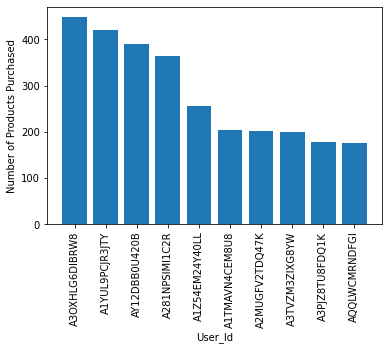

In [78]:
plt.bar(user_10,no_10,label='most recommended users')
plt.xlabel('User_Id')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation= 'vertical')

In [79]:
#Analysing the length of comments and scores 

In [80]:
final = df.sample(n=2000)
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
209751,209752,B000Q7535Y,A1SLSU5VAOYTH0,Scott Pelton,0,0,4,1304726400,"Great tasting snack, but way overpriced when n...",I really like the taste of these little cookie...
355561,355562,B002QWP8H0,A1P28UWVW8H4QD,"J. J. Woodcock ""JW""",0,0,5,1349481600,What my dogs have to say . . .,"Anytime I shout out ""Mr. Greenie! Four dogs co..."
237518,237519,B0000TLFEQ,A3GNEBFFJXN0O4,Steve Sowder,3,5,3,1179964800,Not like mom's,Good but not great. Reminded me a little bit l...
519296,519297,B0012KQOQQ,A2EW0RAG9I401F,Eray,0,0,5,1285977600,BEST TEA - TRY IT WITH LEMON - EXCELENT TEA AN...,BEST TEA - TRY IT WITH LEMON - EXCELENT TEA AN...
451676,451677,B005DQCJK0,A2GEZJHBV92EVR,History buff,1,1,5,1344470400,My cat likes it.,Was feeding my cat a higher priced food called...


In [81]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [84]:
final.duplicated().sum()

0

In [89]:
def calc_len(text):
  return len(text.split(' '))

In [108]:
text_length = final['Text'].apply(calc_len)
text_length.reset_index()

,index,Text
0,209751,58
1,355561,34
2,237518,18
3,519296,16
4,451676,94
...,...,...
1995,170302,39
1996,132404,25
1997,403271,17
1998,325474,81


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



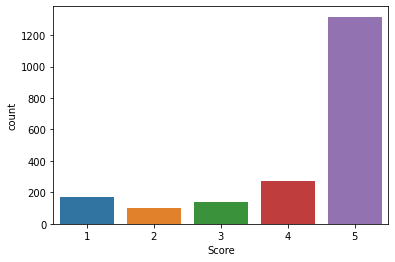

In [109]:
sns.countplot(final['Score'])